# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import random
import numpy as np

# Challenge 1

#### Read the `employees` dataset
Save your data in a variable called `employees`.

In [31]:
# your code here
employees = pd.read_csv(r'C:\Users\ouykh\Downloads\Employee.csv')
employees

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [9]:
# Method 1
# your code here
employees.groupby(['Department'])['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [11]:
# Method 2
# your code here
employees.pivot_table(index=["Department"], values=["Salary"])

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [12]:
# your code here
employees.pivot_table(index=["Department"], columns=["Title"],values=["Salary"])

Salary                  
Title          VP analyst associate
Department                         
HR           70.0    32.5       NaN
IT           70.0    32.5      60.0
Sales         NaN     NaN      55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [13]:
# your code here
employees.pivot_table(index=["Department"], columns=["Title","Years"],values=["Salary"])

Salary                                          
Title          VP analyst             associate            
Years           8       1     2     4         2     3     7
Department                                                 
HR           70.0     NaN  30.0  35.0       NaN   NaN   NaN
IT           70.0    35.0  30.0   NaN       NaN   NaN  60.0
Sales         NaN     NaN   NaN   NaN      55.0  55.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [42]:
# your code here
employees.pivot_table(values=["Salary","Name"], index=["Department", "Title"], 
        aggfunc={"Salary": np.mean, "Name":"count"})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [43]:
# your code here
employees.pivot_table(values=['Salary'], index=["Department", "Title"],
                    aggfunc={'Salary': [np.median,min, max,np.std]})

Salary                       
                        max median   min       std
Department Title                                  
HR         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
IT         VP          70.0   70.0  70.0       NaN
           analyst     35.0   32.5  30.0  3.535534
           associate   60.0   60.0  60.0       NaN
Sales      associate   55.0   55.0  55.0  0.000000

In [ ]:
"""
your commments here
Median, max, min are equivalent for the only VP per dept and one associate in IT, and stand dev is unavailable
Sales associates have the same salary hence the numbers are all equal and stand dev is unavailable

only analyst have different salaries
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [44]:
# your code here
employees.pivot_table(values=['Salary'], index=["Department", "Title"],
                    aggfunc={'Salary': [np.median,min, max,np.std]}, fill_value=0)

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [45]:
# your code here
employees.pivot_table(values=['Salary',"Name"], index=["Department"],
                    aggfunc={'Salary': [np.sum], "Name":"count"})

,Name,Salary
,count,sum
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [47]:
# your code here
employees.pivot_table(values=['Salary',"Years"], index=["Department","Title"],
                    aggfunc={'Salary': [np.mean], "Years":[np.sum]})

Salary Years
                       mean   sum
Department Title                 
HR         VP          70.0     8
           analyst     32.5     6
IT         VP          70.0     8
           analyst     32.5     3
           associate   60.0     7
Sales      associate   55.0     5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [ ]:
# your code here


# Challenge 2

#### Read the `fitbit` dataset 
Save your data in a variable called `fitbit`.

In [4]:
# your code here
fitbit = pd.read_csv(r'C:\Users\ouykh\Downloads\fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [5]:
# your code here
print(fitbit.dtypes)
fitbit.describe()

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [6]:
# your code here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [7]:
import matplotlib.pyplot as plt;

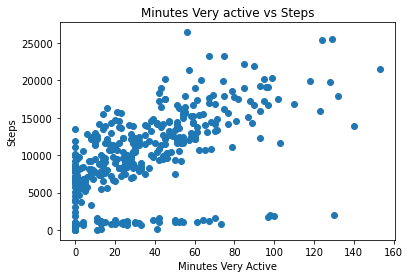

In [9]:
x=fitbit['Minutes Very Active']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes Very active vs Steps')
plt.ylabel('Steps')
plt.xlabel('Minutes Very Active')
plt.show()

#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
The period of very active activity is focused around less than an hour 
and 10 000 steps. the record don't show long and intense activity 
which makes sense. 
the computed correlation is medium
the correlation isn't obvious
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [10]:
# your code here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990091

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

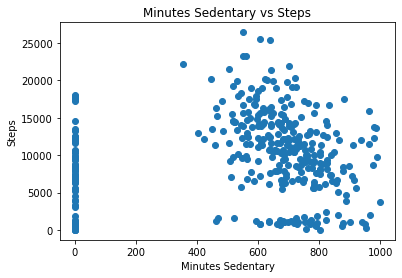

In [11]:
# your code here
x=fitbit['Minutes Sedentary']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('Minutes Sedentary vs Steps')
plt.ylabel('Steps')
plt.xlabel('Minutes Sedentary')
plt.show()

In [ ]:
"""
your commments here
the correlation is very low at 0,0769 and the graph shows two 
groups of dots, one for 0 minutes and another one between 500 and 
800 minutes. Based on the two results, we can assume there's no 
correlation which makes sense.
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [12]:
# your code here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

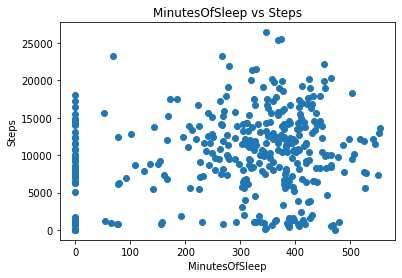

In [13]:
# your code here
x=fitbit['MinutesOfSleep']
y=fitbit['Steps']
plt.scatter(x, y)
plt.title('MinutesOfSleep vs Steps')
plt.ylabel('Steps')
plt.xlabel('MinutesOfSleep')
plt.show()

In [ ]:
"""
your commments here
the computed correlation looks low and the graph should show again two groups. 
it is the sleeping period and no steps should be recorded
no correlation makes sense
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [ ]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [ ]:
# your code here
cor_fit = 

#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [ ]:
# your code here

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [4]:
# your code here
time_grades = pd.read_csv(r'C:\Users\ouykh\Downloads\Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

<AxesSubplot:>

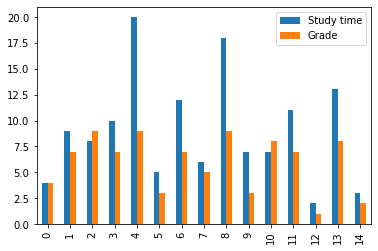

In [6]:
time_grades.plot.bar()

In [4]:
# your code here
FDofTimeGrade=time_grades.pivot_table(values=["Grade","Name"], index=['Study time']
                    ,aggfunc={"Name":"count","Grade":"count"})
FDofTimeGrade

,Grade,Name
Study time,,
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,2,2
8,1,1
9,1,1
10,1,1


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [5]:
# your code here

time_grades.corr()

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [6]:
time_grades.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here

"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

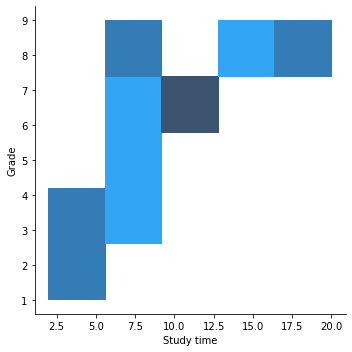

In [18]:
# your code here
sns.displot(time_grades, x="Study time", y="Grade")

In [ ]:
"""
your commments here
when study time increases grade increases
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""